based on 
http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

Predict the Forex Close Price of 20170424 USD/JPY

In [210]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

In [238]:
# parameters to be set 
look_back = 3
epochs = 100
batch_size = 1

In [239]:
# fix random seed for reproducibility
np.random.seed(7)

In [260]:
# read all prices using panda
dataframe =  pd.read_csv('USDJPY_Candlestick_10_m_BID_24.04.2017-25.04.2017.csv',
                              header=0)
dataframe.head()

Local time     Open     High      Low    Close  Volume
0  24.04.2017 00:00:00.000  109.072  109.072  109.072  109.072     0.0
1  24.04.2017 00:10:00.000  109.072  109.072  109.072  109.072     0.0
2  24.04.2017 00:20:00.000  109.072  109.072  109.072  109.072     0.0
3  24.04.2017 00:30:00.000  109.072  109.072  109.072  109.072     0.0
4  24.04.2017 00:40:00.000  109.072  109.072  109.072  109.072     0.0

In [267]:
dataset = dataframe['Close']

In [268]:
# reshape to column vector
#close_prices = close.values.reshape(len(close), 1)
dataset = dataset.values
dataset = dataset.astype('float32')

In [269]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = scaler.fit_transform(close_prices)

In [270]:
# split data into training set and test set
train_size = int(len(close_prices) * 0.67)
test_size = len(close_prices) - train_size
train, test = close_prices[0:train_size,:], close_prices[train_size:len(close_prices),:]

print('Split data into training set and test set... Number of training samples/ test samples:', len(train), len(test))

Split data into training set and test set... Number of training samples/ test samples: 192 96


In [273]:
# convert an array of values into a time series dataset 
# in form 
#                     X                     Y
# t-look_back+1, t-look_back+2, ..., t     t+1

def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# convert Apple's stock price data into time series dataset
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
(trainX.shape, trainY.shape, testX.shape, testY.shape)

((188, 3), (188,), (92, 3), (92,))

In [254]:
# reshape input of the LSTM to be format [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
(trainX.shape, testX.shape)

((188, 3, 1), (92, 3, 1))

In [247]:
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(4, input_shape=(1, look_back)))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, 
               return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size)
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

Epoch 1/1
2s - loss: 0.0613
Epoch 1/1
0s - loss: 0.0168
Epoch 1/1
1s - loss: 0.0126
Epoch 1/1
0s - loss: 0.0108
Epoch 1/1
0s - loss: 0.0104
Epoch 1/1
1s - loss: 0.0103
Epoch 1/1
0s - loss: 0.0103
Epoch 1/1
1s - loss: 0.0103
Epoch 1/1
0s - loss: 0.0103
Epoch 1/1
0s - loss: 0.0102
Epoch 1/1
0s - loss: 0.0101
Epoch 1/1
0s - loss: 0.0100
Epoch 1/1
0s - loss: 0.0099
Epoch 1/1
1s - loss: 0.0097
Epoch 1/1
1s - loss: 0.0095
Epoch 1/1
1s - loss: 0.0092
Epoch 1/1
1s - loss: 0.0090
Epoch 1/1
1s - loss: 0.0087
Epoch 1/1
1s - loss: 0.0084
Epoch 1/1
1s - loss: 0.0081
Epoch 1/1
0s - loss: 0.0079
Epoch 1/1
0s - loss: 0.0076
Epoch 1/1
0s - loss: 0.0074
Epoch 1/1
0s - loss: 0.0072
Epoch 1/1
0s - loss: 0.0070
Epoch 1/1
0s - loss: 0.0068
Epoch 1/1
0s - loss: 0.0066
Epoch 1/1
0s - loss: 0.0065
Epoch 1/1
0s - loss: 0.0063
Epoch 1/1
0s - loss: 0.0061
Epoch 1/1
0s - loss: 0.0060
Epoch 1/1
0s - loss: 0.0059
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
1s - loss: 0.0056
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss:

In [248]:
# make predictions
#trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [249]:
# invert predictions and targets to unscaled
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [250]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.5f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.5f RMSE' % (testScore))

Train Score: 0.12058 RMSE
Test Score: 0.18446 RMSE


In [251]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(close_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift predictions of test data for plotting
testPredictPlot = np.empty_like(close_prices)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(close_prices)-1, :] = testPredict

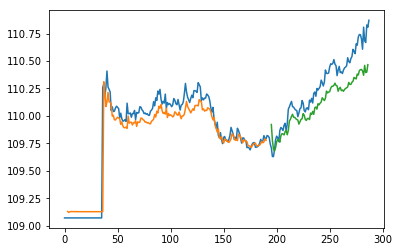

In [252]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close_prices))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()